In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf


In [4]:
csv = pd.read_csv("../stock_daily.csv")
csv

,Open,High,Low,Volume,Close
0,828.659973,833.450012,828.349976,1247700,831.659973
1,823.020020,828.070007,821.655029,1597800,828.070007
2,819.929993,824.400024,818.979980,1281700,824.159973
3,819.359985,823.000000,818.469971,1304000,818.979980
4,819.000000,823.000000,816.000000,1053600,820.450012
...,...,...,...,...,...
727,599.992707,604.832763,562.192568,147100,567.002574
728,558.712504,568.452595,558.712504,7900,567.162558
729,566.892592,567.002574,556.932537,10800,556.972503
730,561.202549,566.432590,558.672539,41200,559.992565


In [5]:
test_csv = csv[600:731]
test_price = csv[["Open", "High", "Low", "Volume"]]
test_ans = list(csv["Close"])


In [6]:
W = tf.Variable(tf.zeros([4,1]))
b = tf.Variable(tf.zeros([1]))


In [7]:
x = tf.placeholder(tf.float32, [None, 4])
y_ = tf.placeholder(tf.float32, [None, 1])


In [9]:
y = tf.nn.softmax(tf.matmul(x, W) + b)

In [15]:
#cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=y, labels=y_))
loss = tf.reduce_mean(tf.square(y - y_))
optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(loss)  #cross_entropy)

In [13]:
predict = tf.equal(tf.argmax(y,1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(predict, tf.float32))

In [16]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(600):
    i = (step * 100) % 600
    rows = csv[i:i+100]
    x_price = rows[["Open", "High", "Low", "Volume"]]
    y_ans = list(rows["Close"])
    feed = {x:x_price, y_:y_ans}
    sess.run(train, feed_dict=feed)
    if step % 100 == 0:
        cre = sess.run(loss, feed_dict=feed) #cross_entropy, feed_dict=feed)
        acc = sess.run(accuracy, feed_dict={x:test_price, y_:test_ans})
        print(f"step={step}, cre={cre}, acc={acc}")

ValueError: Cannot feed value of shape (100,) for Tensor 'Placeholder_1:0', which has shape '(?, 1)'

In [ ]:
acc = sess.run(accuracy, feed_dict={x:test_price, y_:test_ans})

In [21]:
import pandas as pd
import numpy as np
import tensorflow as tf

data = pd.read_csv("../stock_daily.csv")
data

,Open,High,Low,Volume,Close
0,828.659973,833.450012,828.349976,1247700,831.659973
1,823.020020,828.070007,821.655029,1597800,828.070007
2,819.929993,824.400024,818.979980,1281700,824.159973
3,819.359985,823.000000,818.469971,1304000,818.979980
4,819.000000,823.000000,816.000000,1053600,820.450012
...,...,...,...,...,...
727,599.992707,604.832763,562.192568,147100,567.002574
728,558.712504,568.452595,558.712504,7900,567.162558
729,566.892592,567.002574,556.932537,10800,556.972503
730,561.202549,566.432590,558.672539,41200,559.992565


In [22]:
xdata = data[["Open", "High", "Low", "Volume"]]
ydata = pd.DataFrame(data["Close"])

In [23]:
from sklearn.preprocessing import StandardScaler

xdata_ss = StandardScaler().fit_transform(xdata)
ydata_ss = StandardScaler().fit_transform(ydata)

In [24]:
xtrain = xdata_ss[220:, :]
xtest = xdata_ss[:220, :]
ytrain = ydata_ss[220:, :]
ytest = ydata_ss[:220, :]
print(xtrain.shape, ytrain.shape, xtest.shape, ytest.shape)

(512, 4) (512, 1) (220, 4) (220, 1)


In [28]:
w = tf.Variable(tf.random.normal([4, 1]))
b = tf.Variable(tf.random.normal([1]))

x = tf.placeholder(tf.float32, shape=[None, 4])
t = tf.placeholder(tf.float32, shape=[None, 1])

In [30]:
z = tf.matmul(x, w) + b
loss = tf.reduce_mean(tf.square(t - z))

train = tf.compat.v1.train.GradientDescentOptimizer(0.01).minimize(loss)

In [32]:
with tf.compat.v1.Session() as sess:
    sess.run(tf.compat.v1.global_variables_initializer())
    for step in range(2001):
        loss_val, y, _ = sess.run([loss, z, train], feed_dict = {x:xtrain, t:ytrain})
        if step % 200 == 0:
            print(f"{step} cost: {loss_val}\n prediction: {y}")
    y, w_val, b_val = sess.run([z, w, b], feed_dict = {x:xtest, t:ytest})
    print(f"Evaluate: {np.average((y - ytest)**2)}")

0 cost: 2.4727625846862793
 prediction: [[ 5.62402129e-01]
 [ 3.57628763e-02]
 [ 1.42392725e-01]
 [ 1.92895919e-01]
 [ 7.20147252e-01]
 [ 9.40727234e-01]
 [ 1.07694900e+00]
 [ 1.07895994e+00]
 [ 3.43071431e-01]
 [ 7.10914493e-01]
 [ 5.34652948e-01]
 [ 3.34004551e-01]
 [ 1.03929889e+00]
 [ 2.51104403e+00]
 [ 1.09038532e+00]
 [ 6.93472326e-01]
 [ 8.29111695e-01]
 [ 8.23691845e-01]
 [ 1.09495056e+00]
 [ 2.11014509e+00]
 [ 2.15872824e-01]
 [ 9.91333008e-01]
 [ 2.18313122e+00]
 [ 1.01898706e+00]
 [ 9.97733831e-01]
 [ 6.20124340e-01]
 [ 1.19102347e+00]
 [ 1.61184716e+00]
 [ 1.32995427e+00]
 [ 4.73841250e-01]
 [ 8.13715696e-01]
 [ 9.71077561e-01]
 [ 9.62836444e-01]
 [ 4.36231285e-01]
 [ 8.25551689e-01]
 [ 1.57551134e+00]
 [ 1.57481384e+00]
 [ 1.03643394e+00]
 [ 2.09972787e+00]
 [ 1.69570839e+00]
 [ 2.83910155e+00]
 [ 3.64202571e+00]
 [ 4.88005352e+00]
 [ 5.11344719e+00]
 [ 6.51291227e+00]
 [ 7.08931732e+00]
 [ 5.38128757e+00]
 [ 3.09980130e+00]
 [ 1.96016169e+00]
 [ 1.20740378e+00]
 [ 1.89735

1000 cost: 0.0022374566178768873
 prediction: [[ 0.94324297]
 [ 0.9196638 ]
 [ 0.9240838 ]
 [ 0.99874675]
 [ 0.9412148 ]
 [ 0.9931759 ]
 [ 1.0641392 ]
 [ 0.8649419 ]
 [ 0.9004273 ]
 [ 0.8853596 ]
 [ 0.93894345]
 [ 0.9436262 ]
 [ 0.9147408 ]
 [ 0.92164356]
 [ 0.9381729 ]
 [ 0.81756246]
 [ 0.8256712 ]
 [ 0.8268578 ]
 [ 0.75200707]
 [ 0.62642413]
 [ 0.5136924 ]
 [ 0.43003282]
 [ 0.47683603]
 [ 0.6479262 ]
 [ 0.6501542 ]
 [ 0.7022539 ]
 [ 0.57570434]
 [ 0.5620192 ]
 [ 0.5971312 ]
 [ 0.4860683 ]
 [ 0.38827354]
 [ 0.5196628 ]
 [ 0.6074224 ]
 [ 0.5141409 ]
 [ 0.548781  ]
 [ 0.50052905]
 [ 0.44288704]
 [ 0.37609407]
 [ 0.28065896]
 [ 0.4070834 ]
 [ 0.27727222]
 [ 0.23771909]
 [ 0.44168428]
 [ 0.65538603]
 [ 0.8706799 ]
 [ 1.2984033 ]
 [ 1.0596961 ]
 [ 0.8661846 ]
 [ 0.71457684]
 [ 0.5379386 ]
 [ 0.64068675]
 [ 0.6833542 ]
 [ 0.78452563]
 [ 0.5269881 ]
 [ 0.332534  ]
 [ 0.52282035]
 [ 0.45397377]
 [ 0.47554603]
 [ 0.59163886]
 [ 0.75534594]
 [ 0.62639   ]
 [ 0.72915006]
 [ 0.78870755]
 [ 0.8615

2000 cost: 0.0021994232665747404
 prediction: [[ 0.9426319 ]
 [ 0.9203728 ]
 [ 0.92401683]
 [ 0.99833745]
 [ 0.94198847]
 [ 0.9925241 ]
 [ 1.064356  ]
 [ 0.8657417 ]
 [ 0.89998114]
 [ 0.88537127]
 [ 0.93859696]
 [ 0.9439239 ]
 [ 0.9147204 ]
 [ 0.9206029 ]
 [ 0.93825835]
 [ 0.81826115]
 [ 0.8256105 ]
 [ 0.82723254]
 [ 0.75211066]
 [ 0.6265736 ]
 [ 0.51392955]
 [ 0.4312321 ]
 [ 0.47586584]
 [ 0.6472656 ]
 [ 0.64935315]
 [ 0.7015977 ]
 [ 0.5768621 ]
 [ 0.5625489 ]
 [ 0.59688634]
 [ 0.48605195]
 [ 0.38890013]
 [ 0.5197336 ]
 [ 0.6073776 ]
 [ 0.514507  ]
 [ 0.548193  ]
 [ 0.50115377]
 [ 0.44264272]
 [ 0.37567002]
 [ 0.28159136]
 [ 0.4080861 ]
 [ 0.27985987]
 [ 0.23872891]
 [ 0.44021598]
 [ 0.6544386 ]
 [ 0.8691888 ]
 [ 1.2973524 ]
 [ 1.0592873 ]
 [ 0.86686736]
 [ 0.71507716]
 [ 0.5375227 ]
 [ 0.64052206]
 [ 0.68326145]
 [ 0.78430176]
 [ 0.5282987 ]
 [ 0.3337784 ]
 [ 0.5227909 ]
 [ 0.45479864]
 [ 0.4767205 ]
 [ 0.5909134 ]
 [ 0.75544107]
 [ 0.6257578 ]
 [ 0.728319  ]
 [ 0.7887126 ]
 [ 0.8629

NameError: name 'data' is not defined

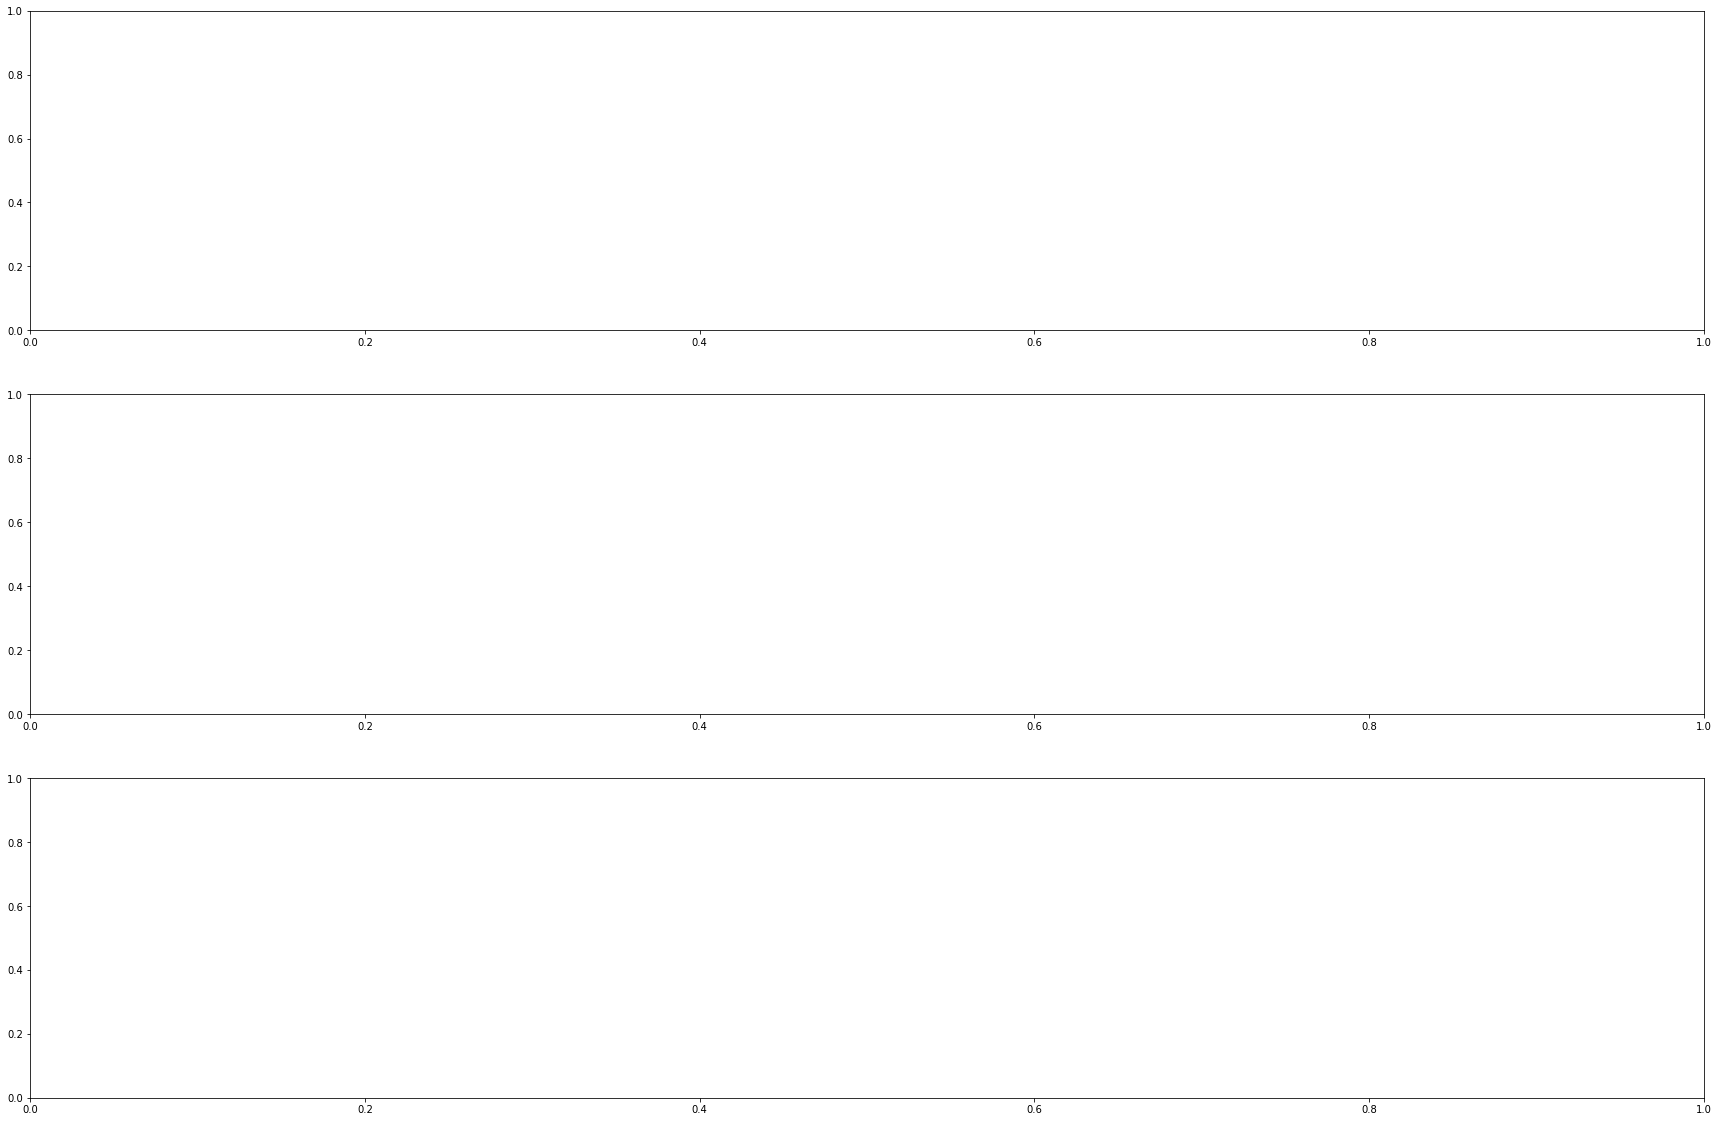

In [2]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(30, 20))
ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3)

ax1.plot(data["Open"])
ax2.plot(data["High"])
ax2.plot(data["Low"])
ax1.plot(data["Close"])

ax2.plot(data["Volume"])

ax3.plot(data["Open"][0:30], linewidth=3.0, label="Open")
ax3.plot(data["High"][0:30], linewidth=3.0, label="High")
ax3.plot(data["Low"][0:30], linewidth=3.0, label="Low")
ax3.plot(data["Close"][0:30], linewidth=3.0, label="Close")

ax3.legend(prop={"size":30})
plt.show()

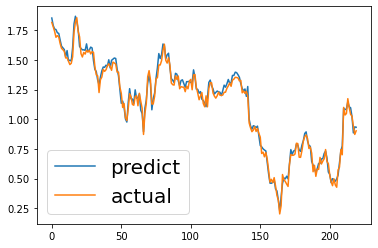

In [39]:
tf_predicted = np.dot(xdata_ss, w_val) + b_val

plt.figure()
plt.plot(tf_predicted[:220], label="predict")
plt.plot(ytest, label="actual")

plt.legend(prop={"size":20})
plt.show()
